# Huisje kopen met de egger

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import *

## Parameters

### Inputs

calcu

In [2]:
aankoopprijs = 475000
kosten_pct = 0.065
leen_pct = 0.9
inflatie = 0.02
opslag_pct = 0.025
waardestijging = 0.008
start_loon = 100000
ki = 451
uitgaven_pct_init = 0.25
onderhoud_pct = 0.01
leen_interest = .03
jaren = 20
invest_pct = .8
invest_return = 0.08


### Berekende waarden

In [9]:
# Define initial parameters
purchase_price = 475000  # Example purchase price
loan_percentage = 0.9  # 90% of the price is financed through a loan
additional_costs_percentage = 0.065  # Additional costs related to purchase
loan_interest_rate = 0.0366  # Annual interest rate of the loan
loan_term_years = 20  # Loan term in years
start_salary = 100000  # Starting annual salary
inflation_rate = 0.02  # Annual inflation rate
salary_growth_rate = 0.015  # Annual salary growth rate
property_appreciation_rate = 0.008  # Annual property appreciation rate
expenditure_percentage = 0.25  # Percentage of salary spent on expenditures
property_tax = 451  # Annual property tax

# Calculate initial loan details
loan_amount, down_payment, monthly_loan_payment, total_purchase_cost = calculate_house_purchase_costs(
    purchase_price, loan_percentage, additional_costs_percentage, loan_interest_rate, loan_term_years)

# Initialize variables for simulation
current_salary = start_salary
current_house_value = purchase_price
current_debt = loan_amount
total_paid = down_payment
annual_loan_payment = monthly_loan_payment * 12

# Run the simulation over the loan term
for year in range(1, loan_term_years + 1):
    # Update salary and house value for the new year
    current_salary, cash_gain, current_house_value, current_debt = update_yearly_status(
        current_salary, current_house_value, current_debt, annual_loan_payment, property_tax, inflation_rate, salary_growth_rate, property_appreciation_rate, expenditure_percentage)

    # Calculate net value addition for the year
    net_value_addition, _ = calculate_net_value_addition(current_salary, current_debt, expenditure_percentage)

    # Update total amount paid over the years
    total_paid += annual_loan_payment + property_tax

    # Output yearly status
    print(f"Year {year}:")
    print(f"  - Salary: {current_salary:.2f}")
    print(f"  - House Value: {current_house_value:.2f}")
    print(f"  - Remaining Debt: {current_debt:.2f}")
    print(f"  - Total Paid: {total_paid:.2f}")
    print(f"  - Net Value Addition: {net_value_addition:.2f}\n")

# Final status after the loan term
print("Final Status After Loan Term:")
print(f"  - Total Paid: {total_paid:.2f}")
print(f"  - House Value: {current_house_value:.2f}")
print(f"  - Net Gain: {current_house_value - total_paid:.2f}")


Year 1:
  - Salary: 103530.00
  - House Value: 488376.00
  - Remaining Debt: 573333.29
  - Total Paid: 109001.44
  - Net Value Addition: 38823.75

Year 2:
  - Salary: 107184.61
  - House Value: 502128.67
  - Remaining Debt: 543157.85
  - Total Paid: 139627.87
  - Net Value Addition: 40194.23

Year 3:
  - Salary: 110968.23
  - House Value: 516268.61
  - Remaining Debt: 512982.41
  - Total Paid: 170254.31
  - Net Value Addition: 41613.08

Year 4:
  - Salary: 114885.40
  - House Value: 530806.74
  - Remaining Debt: 482806.98
  - Total Paid: 200880.74
  - Net Value Addition: 43082.03

Year 5:
  - Salary: 118940.86
  - House Value: 545754.25
  - Remaining Debt: 452631.54
  - Total Paid: 231507.18
  - Net Value Addition: 44602.82

Year 6:
  - Salary: 123139.47
  - House Value: 561122.69
  - Remaining Debt: 422456.11
  - Total Paid: 262133.62
  - Net Value Addition: 46177.30

Year 7:
  - Salary: 127486.29
  - House Value: 576923.91
  - Remaining Debt: 392280.67
  - Total Paid: 292760.05
  - N

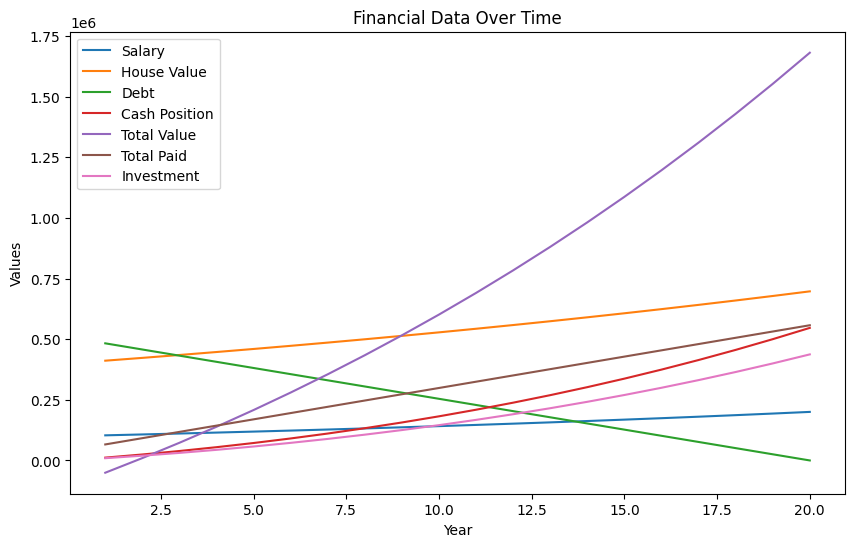

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# ... [Include the defined functions here] ...

# Initialize variables for simulation
current_salary = start_salary
current_house_value = purchase_price
current_debt = loan_amount
total_paid = down_payment
annual_loan_payment = monthly_loan_payment * 12
cash_position = 0
investment_value = 0

# List to store yearly data
yearly_data = []

# Run the simulation over the loan term
for year in range(1, loan_term_years + 1):
    # Update salary and house value for the new year
    current_salary, cash_gain, current_house_value, current_debt = update_yearly_status(
        current_salary, current_house_value, current_debt, annual_loan_payment, property_tax, inflation_rate, salary_growth_rate, property_appreciation_rate, expenditure_percentage)

    # Update cash position and investment value
    cash_position += cash_gain
    investment_value += cash_gain * invest_pct  # Assuming some percentage of cash gain is invested

    # Add data to the list
    yearly_data.append({
        'Year': year,
        'Salary': current_salary,
        'House Value': current_house_value,
        'Debt': current_debt,
        'Cash Position': cash_position,
        'Total Value': current_house_value - current_debt + cash_position + investment_value,
        'Total Paid': total_paid,
        'Investment': investment_value
    })

    # Update total paid
    total_paid += annual_loan_payment + property_tax

# Create a DataFrame from the list
df = pd.DataFrame(yearly_data)
df.set_index('Year', inplace=True)

# Plot the data
df.plot(y=['Salary', 'House Value', 'Debt', 'Cash Position', 'Total Value', 'Total Paid', 'Investment'],
        xlabel='Year', ylabel='Values', title='Financial Data Over Time', figsize=(10, 6))
plt.legend()
plt.show()

# Extract the final value for further use
final_value = df['Total Value'].iloc[-1]


In [4]:
helpers.calculate_loan_cost(leen_bedrag, leen_interest, jaren)

NameError: name 'helpers' is not defined

## Functions

In [ ]:
def update_loon(loon, inflatie, opslag):
    return loon*(1+inflatie)*(1+opslag)

def calc_netto_value_add(loon, openstaand_kapitaal, uitgaven_pct):
    netto_loon = loon/2 ## Temp
    val = netto_loon*(1-uitgaven_pct)
    return val, netto_loon    

In [ ]:
def update_jaar(loon, huis, schuld):
    ## Calc val_cash_gain
    val_cash_gain = loon/2*(1-uitgaven_pct) - leen_jaarlijks - ki

    ## Upate loon, waarde huis, openstaand bedrag
    loon *= (1+inflatie)*(1+opslag_pct)
    waarde_huis *= (1+inflatie)*(1+waardestijging)
    openstaand_bedrag += leen_jaarlijks

    return loon, val_cash_gain, waarde_huis, openstaand_bedrag

# Simulatie Kopen

In [ ]:
data = []

jaren = 25

loon = start_loon
huis_waarde = aankoopprijs
schuld = leen_totaal
cash = 0
value = 0
betaling = eigen_inleg
invest = 0
uitgaven_pct = uitgaven_pct_init

for jaar in range(1, jaren + 1):
    if jaar == 7:
        uitgaven_pct += .15
    huis_waarde *= (1+inflatie)*(1+waardestijging)
    schuld += (-leen_jaarlijks)
    cash_flow = loon/2*(1-uitgaven_pct) - leen_jaarlijks - ki*(1+inflatie)**int(jaar) - huis_waarde*onderhoud_pct
    invest *= (1+invest_return)
    if cash > 0:
        invest += cash_flow*invest_pct
        cash += cash_flow*(1-invest_pct)
    else:
        cash += cash_flow
    value = huis_waarde+cash-schuld+invest
    loon *= (1+inflatie)*(1+opslag_pct)
    betaling += leen_jaarlijks + ki + huis_waarde*onderhoud_pct


    data.append({
        'Jaar': jaar,
        'Loon': loon,
        'Waarde Huis': huis_waarde,
        'Schuld': schuld,
        'Cash Flow': cash_flow,
        'cashpositie': cash,
        'Waarde': value,
        'Betaald bedrag': betaling,
        'Investeerd': invest
    })

df = pd.DataFrame(data)
df.set_index('Jaar', inplace=True)
df.head(25)

,Loon,Waarde Huis,Schuld,Cash Flow,cashpositie,Waarde,Betaald bedrag,Investeerd
Jaar,,,,,,,,
1,105570.000000,411264.000000,5.279858e+05,10927.933500,10927.933500,-1.057938e+05,92563.046500,0.000000e+00
2,111450.249000,422845.194240,5.059863e+05,12891.671158,13506.267732,-5.932155e+04,119241.904942,1.031334e+04
3,117658.027869,434752.514910,4.839869e+05,14968.306918,16499.929115,-9.621450e+03,146039.836591,2.311305e+04
4,124211.580022,446995.145730,4.619875e+05,17164.225590,19932.774233,4.363386e+04,172960.194548,3.869347e+04
5,131130.165029,459582.529033,4.399881e+05,19486.170276,23830.008288,1.008023e+05,200006.426338,5.737789e+04
6,138434.115221,472524.373051,4.179887e+05,21941.262404,28218.260769,1.622750e+05,227182.076569,7.952113e+04
7,146144.895439,485830.659396,3.959893e+05,14154.464236,31049.153617,2.180969e+05,254490.789663,9.720639e+04
8,154285.166115,499511.650765,3.739899e+05,16320.527243,34313.259065,2.778743e+05,281936.312670,1.180393e+05
9,162878.849867,513577.898850,3.519905e+05,18611.377598,38035.534585,3.419945e+05,309522.498159,1.423716e+05


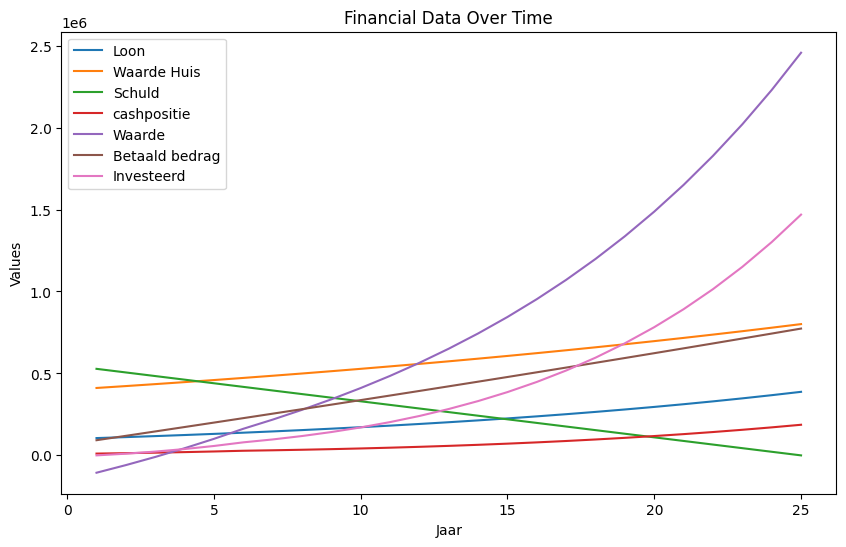

In [ ]:
df.plot( y=['Loon', 'Waarde Huis', 'Schuld', 'cashpositie', 'Waarde', 'Betaald bedrag', 'Investeerd'],
        xlabel='Jaar', ylabel='Values', title='Financial Data Over Time', figsize=(10, 6))
plt.legend()
plt.show()
w_kopen = df['Waarde']

In [ ]:
data = []

jaren = 25

loon = start_loon
huis_waarde = aankoopprijs
schuld = leen_totaal
cash = 0
value = 0
betaling = eigen_inleg
invest = 0
huur = 0*12
betaald_huurgeld = 0
uitgaven_pct = uitgaven_pct_init
for jaar in range(1, jaren + 1):
    if jaar == 7:
        uitgaven_pct += .15
    cash_flow = loon/2*(1-uitgaven_pct) - huur
    invest *= (1+invest_return)
    betaald_huurgeld +=huur
    if cash_flow > 0:
        invest += cash_flow*invest_pct
        cash += cash_flow*(1-invest_pct)
    else:
        cash += cash_flow
    value = cash+invest
    huur *= (1+inflatie)
    loon *= (1+inflatie)*(1+opslag_pct)
    


    data.append({
        'Jaar': jaar,
        'Loon': loon,
        'Cash Flow': cash_flow,
        'cashpositie': cash,
        'Waarde': value,
        'Huur': huur/12,
        'Betaald huur': betaald_huurgeld,
        'Investeerd': invest
    })

df = pd.DataFrame(data)
df.set_index('Jaar', inplace=True)
df.head(25)
w_huren = df['Waarde']
df.head(25)

,Loon,Cash Flow,cashpositie,Waarde,Huur,Betaald huur,Investeerd
Jaar,,,,,,,
1,105570.000000,37500.000000,7500.000000,3.750000e+04,0.0,0.0,3.000000e+04
2,111450.249000,39588.750000,15417.750000,7.948875e+04,0.0,0.0,6.407100e+04
3,117658.027869,41793.843375,23776.518675,1.264083e+05,0.0,0.0,1.026318e+05
4,124211.580022,44121.760451,32600.870765,1.787406e+05,0.0,0.0,1.461397e+05
5,131130.165029,46579.342508,41916.739267,2.370111e+05,0.0,0.0,1.950944e+05
6,138434.115221,49173.811886,51751.501644,3.017925e+05,0.0,0.0,2.500410e+05
7,146144.895439,41530.234566,60057.548557,3.633260e+05,0.0,0.0,3.032684e+05
8,154285.166115,43843.468632,68826.242284,4.314309e+05,0.0,0.0,3.626047e+05
9,162878.849867,46285.549834,78083.352250,5.067248e+05,0.0,0.0,4.286415e+05


## Inlezen + Verwerken Data

In [ ]:
df_lening = pd.read_csv('/Users/m1ls/Desktop/huis_kopen/data/lening_data.csv')
df_lening.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/m1ls/Desktop/huis_kopen/data/lening_data.csv'

In [ ]:
555567/13.82/2/1.02**25

12251.6366550935

In [ ]:
1800*12

21600

In [ ]:
50000/12/2*.65

1354.1666666666667

In [ ]:
20500/2/12

854.1666666666666